In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
main_df = pd.read_csv('Taxi_trip_cleaned.csv',index_col='Unnamed: 0')

Wall time: 9.28 s


In [3]:
main_df.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Local_pickup,Local_dropoff,Miles per second
0,01/01/2021 12:00:00 AM,01/01/2021 12:15:00 AM,1021,3.17,13.25,0.0,0.0,0,13.25,Cash,Flash Cab,NaN,NaN,NaN,41.975171,-87.687516,POINT (-87.6875155152 41.9751709433),False,True,0.003105
1,01/01/2021 12:00:00 AM,01/01/2021 03:30:00 PM,56047,7.10,20.50,0.0,0.0,6.5,27,Cash,Flash Cab,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN,True,False,0.000127
2,01/01/2021 12:00:00 AM,01/01/2021 12:00:00 AM,120,0.10,3.50,0.0,0.0,1,4.5,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),True,True,0.000833
4,01/01/2021 12:00:00 AM,01/01/2021 12:00:00 AM,50,0.38,4.00,0.0,0.0,0,4,Cash,Flash Cab,41.836150,-87.648788,POINT (-87.6487879519 41.8361501547),41.850266,-87.667569,POINT (-87.667569312 41.8502663663),True,True,0.007600
5,01/01/2021 12:00:00 AM,01/01/2021 12:15:00 AM,960,10.60,28.00,0.0,0.0,0,28,Cash,Taxi Affiliation Services,41.857184,-87.620335,POINT (-87.6203346241 41.8571838585),NaN,NaN,NaN,True,False,0.011042


In [4]:
time_data = main_df[['Trip Start Timestamp','Trip Seconds','Trip Miles','Company']]
time_data.head()

,Trip Start Timestamp,Trip Seconds,Trip Miles,Company
0,01/01/2021 12:00:00 AM,1021,3.17,Flash Cab
1,01/01/2021 12:00:00 AM,56047,7.10,Flash Cab
2,01/01/2021 12:00:00 AM,120,0.10,Taxi Affiliation Services
4,01/01/2021 12:00:00 AM,50,0.38,Flash Cab
5,01/01/2021 12:00:00 AM,960,10.60,Taxi Affiliation Services


In [5]:
time_data['Trip Start Timestamp']=pd.to_datetime(time_data['Trip Start Timestamp'])


In [6]:
time_data['year']=time_data['Trip Start Timestamp'].dt.year
time_data['month']=time_data['Trip Start Timestamp'].dt.month
time_data['day']=time_data['Trip Start Timestamp'].dt.day_name()

In [7]:
time_data['time']=time_data['Trip Start Timestamp'].dt.time

In [8]:
time_data['date'] = time_data['Trip Start Timestamp'].dt.date


In [9]:
time_data.sample(10)

,Trip Start Timestamp,Trip Seconds,Trip Miles,Company,year,month,day,time,date
1222281,2021-06-20 12:30:00,1620,12.60,Taxi Affiliation Services,2021,6,Sunday,12:30:00,2021-06-20
2176843,2021-09-03 06:00:00,1387,15.55,Sun Taxi,2021,9,Friday,06:00:00,2021-09-03
1412083,2021-07-07 10:30:00,1605,16.95,Sun Taxi,2021,7,Wednesday,10:30:00,2021-07-07
3447044,2021-11-26 16:30:00,1083,1.43,24 Seven Taxi,2021,11,Friday,16:30:00,2021-11-26
2633589,2021-10-04 16:45:00,1800,6.30,Taxi Affiliation Services,2021,10,Monday,16:45:00,2021-10-04
2332162,2021-09-14 17:30:00,1782,4.00,Medallion Leasin,2021,9,Tuesday,17:30:00,2021-09-14
445650,2021-03-22 23:45:00,557,2.50,Flash Cab,2021,3,Monday,23:45:00,2021-03-22
2046033,2021-08-24 14:15:00,180,0.60,Chicago Independents,2021,8,Tuesday,14:15:00,2021-08-24
3451534,2021-11-26 22:15:00,1560,17.70,Taxi Affiliation Services,2021,11,Friday,22:15:00,2021-11-26
1586690,2021-07-21 05:30:00,1458,16.52,Flash Cab,2021,7,Wednesday,05:30:00,2021-07-21


In 2021, most people were in isolation due to Covid-19, but towards the end of the year, the pandemic is less threatening as more people were vaccinated. Hence, there is an increasing trend in the number of rides over the year 2021

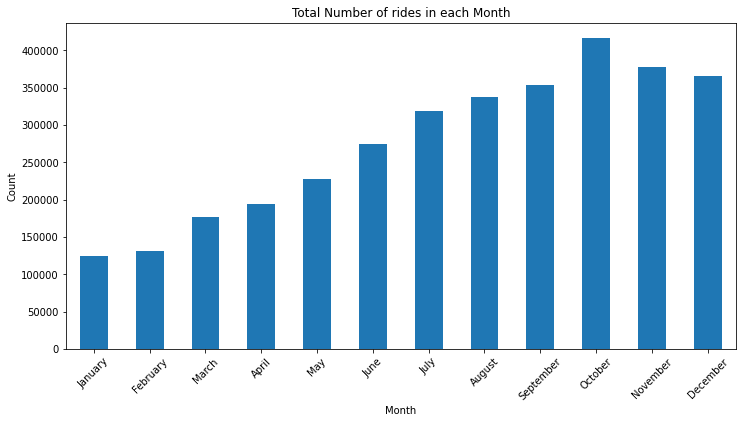

In [10]:
plt.figure(figsize=(12,6))

time_data.groupby('month').size().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total Number of rides in each Month')
plt.xticks(np.arange(12),['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],rotation = 45)
plt.show()

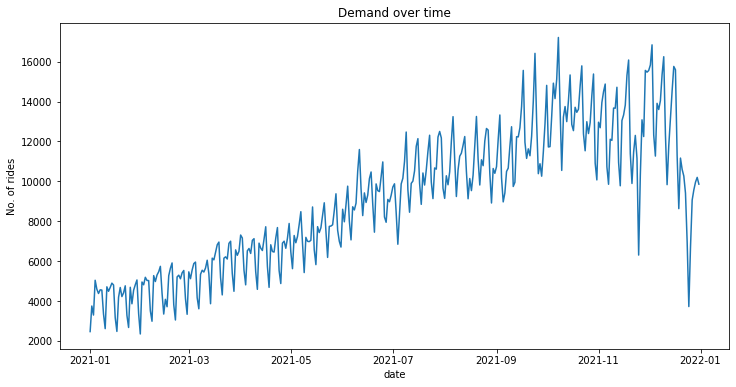

In [11]:
plt.figure(figsize=(12,6))
plt.title('Demand over time')
plt.xlabel('Date')
plt.ylabel('No. of rides')
time_data.groupby('date').size().plot()
plt.show()

### Most people travel on Friday

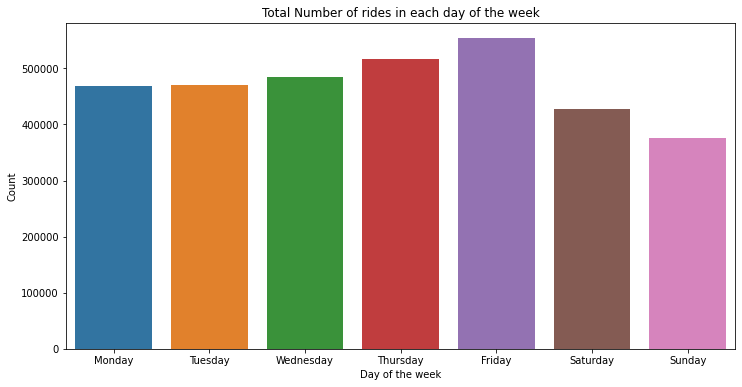

In [12]:
plt.figure(figsize=(12,6))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
grouped_day=time_data.groupby(['day']).size()
sns.barplot(x = grouped_day.index, y=grouped_day.values,order = order)
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Total Number of rides in each day of the week')

plt.show()

In [13]:
time_data['time_frame'] = pd.cut(time_data['Trip Start Timestamp'].dt.hour, bins=4,labels = ['Midnight','Morning','Afternoon','Night'])
time_data.sample(10)

,Trip Start Timestamp,Trip Seconds,Trip Miles,Company,year,month,day,time,date,time_frame
3129770,2021-11-04 16:15:00,1320,10.90,Taxi Affiliation Services,2021,11,Thursday,16:15:00,2021-11-04,Afternoon
3551259,2021-12-02 19:30:00,360,1.00,"Taxicab Insurance Agency, LLC",2021,12,Thursday,19:30:00,2021-12-02,Night
737856,2021-04-30 16:00:00,834,2.20,Chicago Independents,2021,4,Friday,16:00:00,2021-04-30,Afternoon
1219007,2021-06-20 00:15:00,540,2.10,Medallion Leasin,2021,6,Sunday,00:15:00,2021-06-20,Midnight
1944233,2021-08-16 18:45:00,2520,1.10,Taxi Affiliation Services,2021,8,Monday,18:45:00,2021-08-16,Night
955258,2021-05-25 20:15:00,1260,6.60,Medallion Leasin,2021,5,Tuesday,20:15:00,2021-05-25,Night
3168821,2021-11-07 06:30:00,1108,12.43,Flash Cab,2021,11,Sunday,06:30:00,2021-11-07,Morning
2705099,2021-10-08 18:00:00,2280,12.30,Taxi Affiliation Services,2021,10,Friday,18:00:00,2021-10-08,Night
2016799,2021-08-22 08:45:00,1140,0.60,Taxi Affiliation Services,2021,8,Sunday,08:45:00,2021-08-22,Morning
2980933,2021-10-26 00:45:00,1260,6.90,"Taxicab Insurance Agency, LLC",2021,10,Tuesday,00:45:00,2021-10-26,Midnight


### Most people Travel in the afternoon

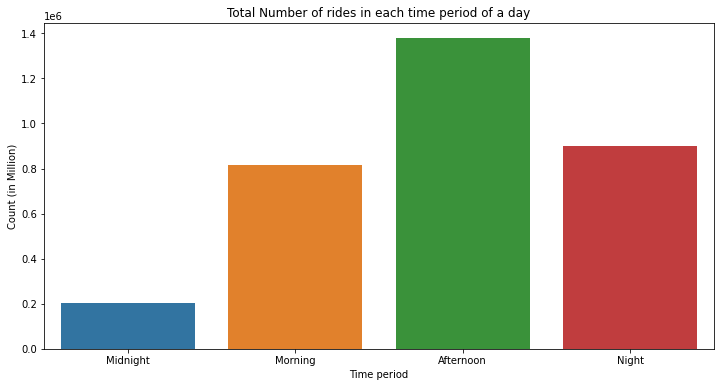

In [14]:
plt.figure(figsize=(12,6))

grouped_day=time_data.groupby(['time_frame']).size()
sns.barplot(x = grouped_day.index, y=grouped_day.values)
plt.xlabel('Time period')
plt.ylabel('Count (in Million)')
plt.title('Total Number of rides in each time period of a day')

plt.show()

In [15]:
payment_data = main_df[['Trip Seconds',
       'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total',
       'Payment Type', 'Company','Local_pickup','Local_dropoff','Miles per second']]

In [16]:
payment_data.sample(10)

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Local_pickup,Local_dropoff,Miles per second
3464872,1920,5.50,22.50,0.00,0.0,0.00,22.50,Unknown,Taxi Affiliation Services,True,True,0.002865
57399,1912,10.61,30.75,0.07,0.0,0.00,30.82,Prcard,Flash Cab,True,True,0.005549
223583,382,0.74,5.75,0.00,0.0,1.00,6.75,Cash,Sun Taxi,True,True,0.001937
2724668,294,0.75,5.50,0.00,0.0,0.00,5.50,Cash,Flash Cab,True,True,0.002551
2368533,2184,21.06,52.25,2.00,0.0,4.0,58.75,Credit Card,Sun Taxi,True,True,0.009643
1294988,1867,14.40,39.64,0.00,0.0,0,39.64,Cash,Flash Cab,True,True,0.007713
2765862,1680,9.10,26.00,0.00,0.0,7,33.00,Cash,"Taxicab Insurance Agency, LLC",True,False,0.005417
2846616,1680,12.60,32.75,0.00,0.0,5.5,38.25,Cash,Globe Taxi,True,True,0.007500
332580,1380,0.60,27.50,0.00,0.0,0.00,27.50,Unknown,Taxi Affiliation Services,True,True,0.000435
1696679,2280,0.80,35.50,0.00,0.0,0.00,35.50,Unknown,Taxi Affiliation Services,True,True,0.000351


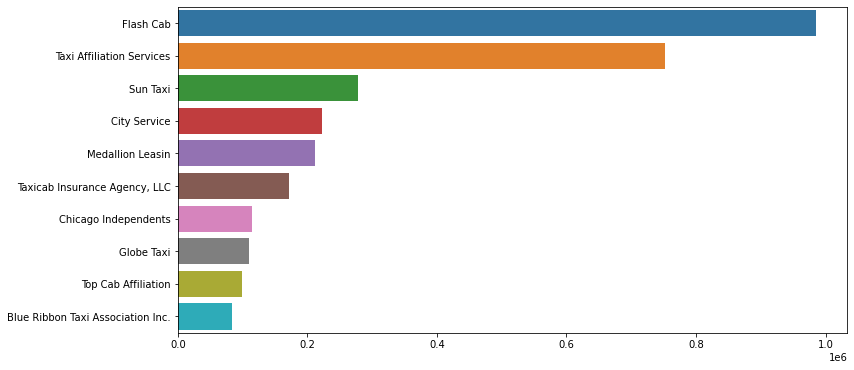

In [17]:
#top 10
plt.figure(figsize=(12,6))
company_counts=payment_data['Company'].value_counts()[:10]
sns.barplot(y= company_counts.index, x = company_counts.values, orient='h')
plt.show()


# top 5 competitors take up 72% of the total rides

In [18]:
percent_ride =100*sum(list(payment_data['Company'].value_counts().values[:5]))/sum(list(payment_data['Company'].value_counts()))
percent_ride

74.21314475626382

In [19]:
list(payment_data['Company'].value_counts().index[:5])

['Flash Cab',
 'Taxi Affiliation Services',
 'Sun Taxi',
 'City Service',
 'Medallion Leasin']

In [20]:
payment_data['fare per mile'] = payment_data['Fare']/payment_data['Trip Miles']
payment_data['fare per sec'] = payment_data['Fare']/payment_data['Trip Seconds']

In [21]:
payment_data['fare per mile'].describe()

count    3.298669e+06
mean     1.247099e+01
std      3.105768e+02
min      6.896552e-04
25%      2.733236e+00
50%      3.773585e+00
75%      5.952381e+00
max      9.500470e+04
Name: fare per mile, dtype: float64

### inconsistency of the fare per mile and second

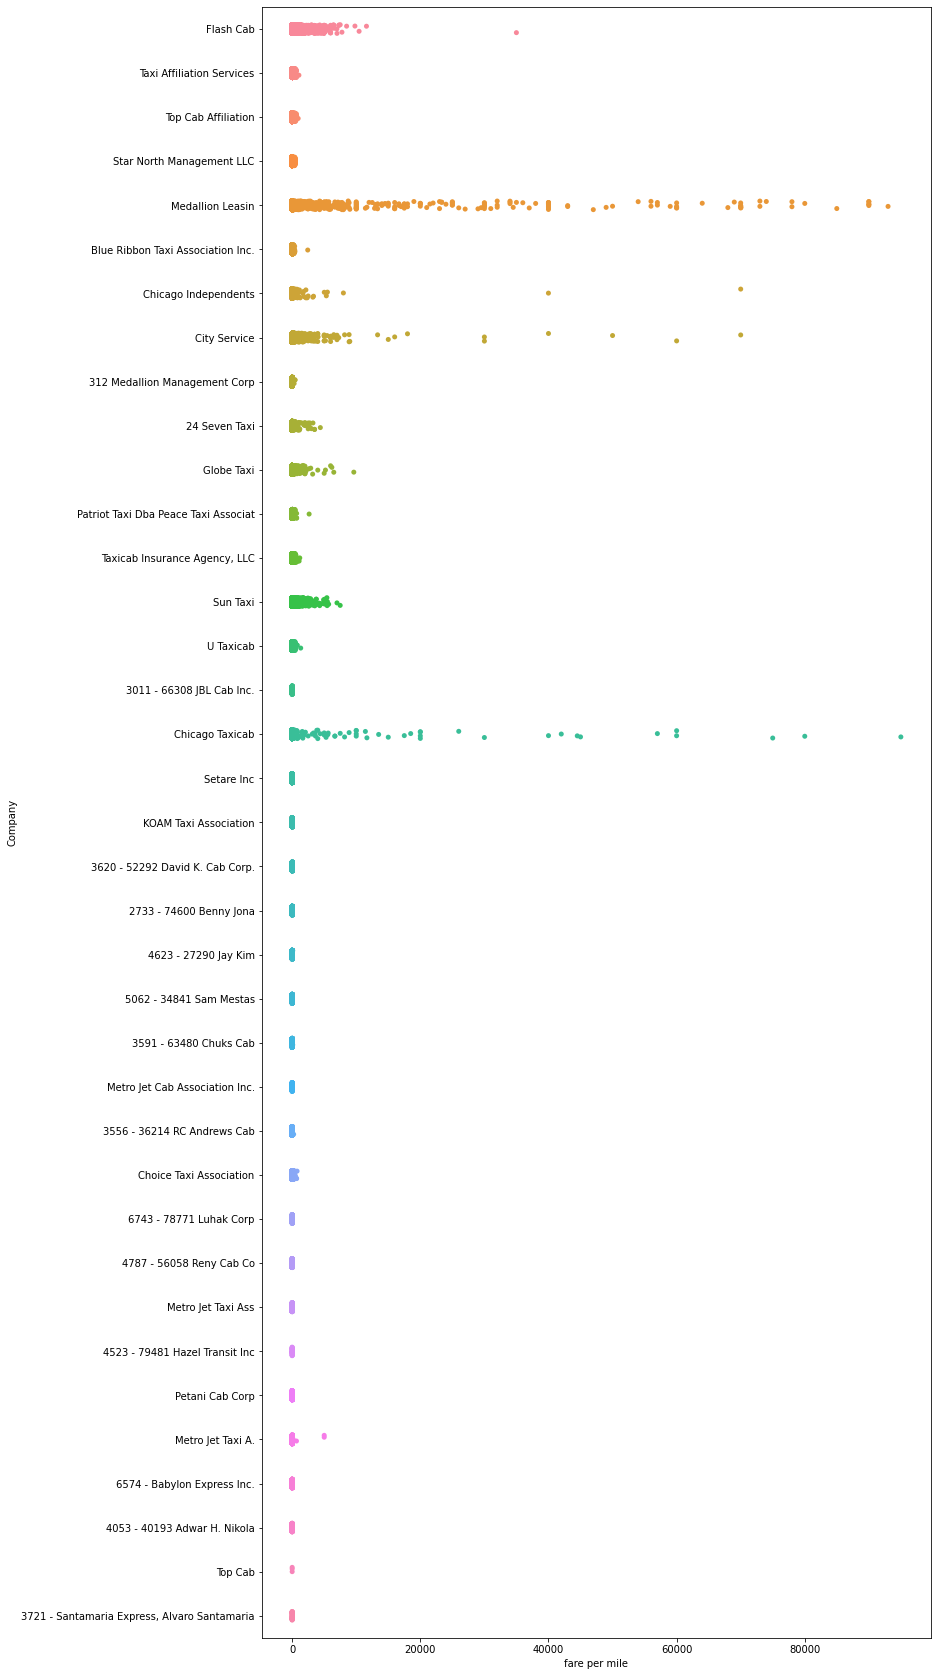

In [23]:
plt.figure(figsize=(12,30))
sns.stripplot(x = 'fare per mile', y = 'Company', data = payment_data,orient='h')
plt.show()

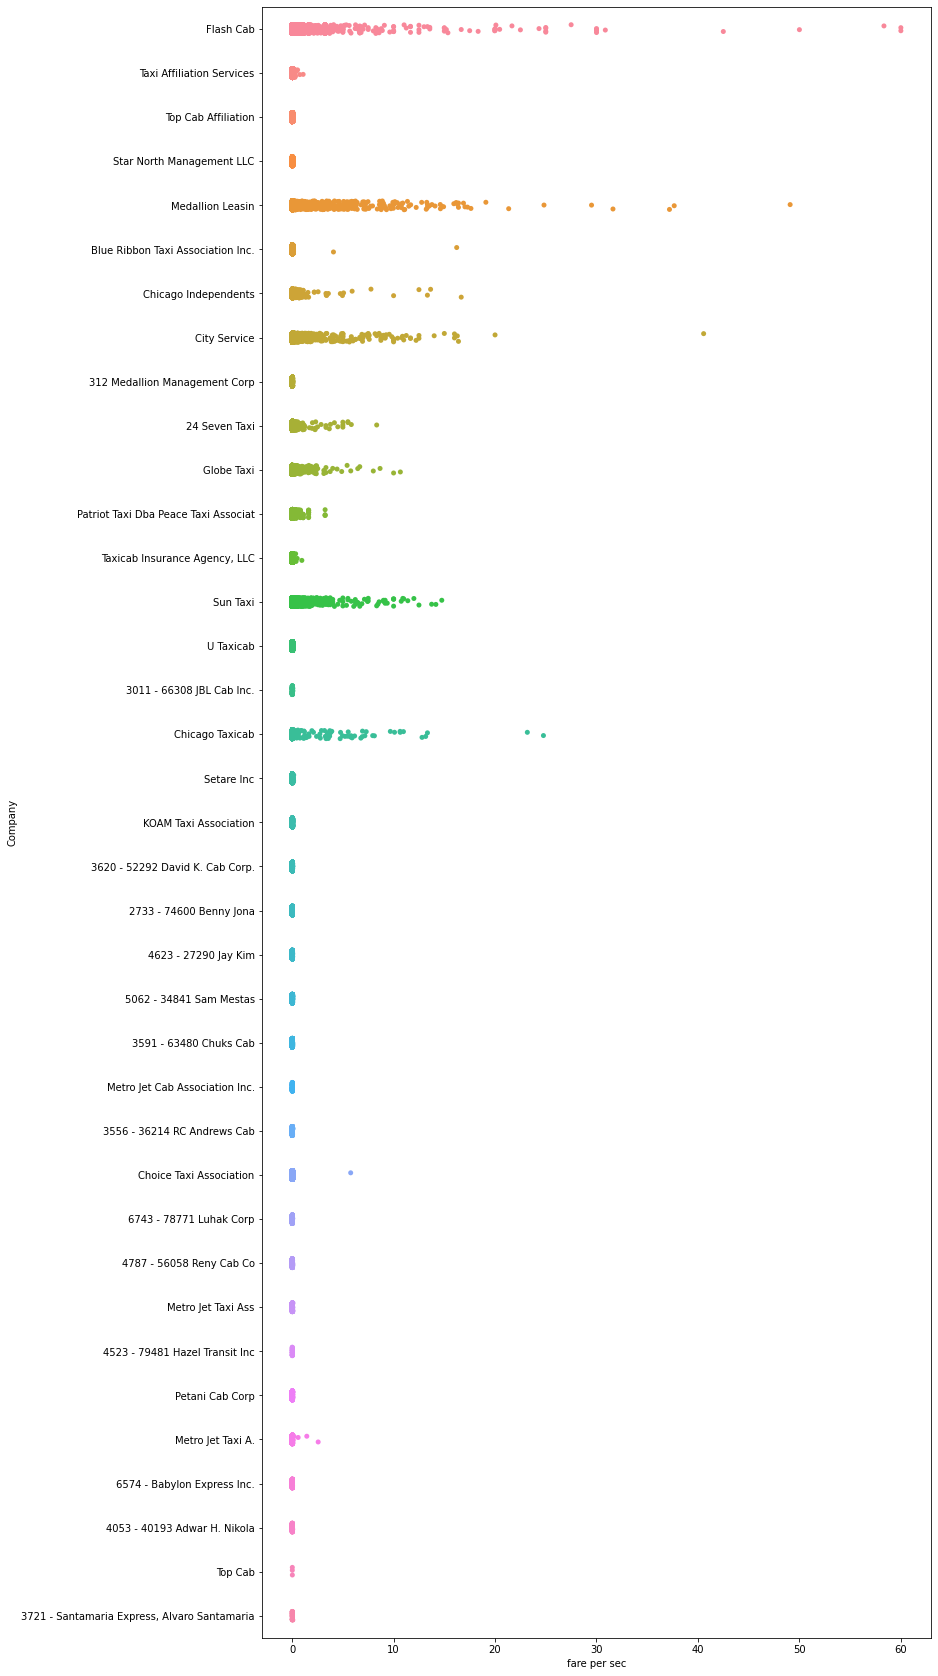

In [24]:
plt.figure(figsize=(12,30))
sns.stripplot(x = 'fare per sec', y = 'Company', data = payment_data,orient='h')
plt.show()

In [25]:
new_features =  time_data[['day','time_frame']]
new_features

,day,time_frame
0,Friday,Midnight
1,Friday,Midnight
2,Friday,Midnight
4,Friday,Midnight
5,Friday,Midnight
...,...,...
3948010,Friday,Night
3948011,Friday,Night
3948013,Friday,Night
3948016,Friday,Night


In [26]:
extracted = main_df[['Trip Seconds','Trip Miles','Fare','Payment Type','Company','Local_pickup','Local_dropoff']]

In [27]:
clean_data =pd.concat([extracted,new_features], axis=1)

In [28]:
clean_data

,Trip Seconds,Trip Miles,Fare,Payment Type,Company,Local_pickup,Local_dropoff,day,time_frame
0,1021,3.17,13.25,Cash,Flash Cab,False,True,Friday,Midnight
1,56047,7.10,20.50,Cash,Flash Cab,True,False,Friday,Midnight
2,120,0.10,3.50,Cash,Taxi Affiliation Services,True,True,Friday,Midnight
4,50,0.38,4.00,Cash,Flash Cab,True,True,Friday,Midnight
5,960,10.60,28.00,Cash,Taxi Affiliation Services,True,False,Friday,Midnight
...,...,...,...,...,...,...,...,...,...
3948010,724,2.08,9.25,Credit Card,Flash Cab,True,True,Friday,Night
3948011,496,3.49,11.50,Cash,Flash Cab,True,True,Friday,Night
3948013,1261,13.40,34.00,Credit Card,City Service,False,True,Friday,Night
3948016,900,0.30,18.00,Credit Card,Taxi Affiliation Services,True,False,Friday,Night


In [29]:
#clean_data.to_csv('Taxi_trip_ML.csv')